In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [3]:
df1=pd.read_csv("data1.csv")
df1

,Unnamed: 0,S No.,Movie Name,Duration,Year,Rating,Metascore,Director 1,Director 2,Director 3
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1750,1750,"1,751",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1751,1751,"1,752",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1752,1752,"1,753",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN
1753,1753,"1,754",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [4]:
df2=pd.read_csv("data2.csv")
df2

,Unnamed: 0,Movie Name,Star 1,Star 2,Star 3,Star 4,Genre 1,Genre 2,Genre 3,Gross Collection,Certification,votes
0,0,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"128,166"
1,1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,725,946"
2,2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,891,287"
3,3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,419,396"
4,4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,919,877"
...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1750,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,924"
1751,1751,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,710"
1752,1752,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,918"
1753,1753,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,578"


In [5]:
df=pd.DataFrame()

In [6]:
df = pd.merge(df1, df2)
df

,Unnamed: 0,S No.,Movie Name,Duration,Year,Rating,Metascore,Director 1,Director 2,Director 3,Star 1,Star 2,Star 3,Star 4,Genre 1,Genre 2,Genre 3,Gross Collection,Certification,votes
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"128,166"
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,725,946"
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,891,287"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,419,396"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,919,877"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1750,"1,751",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,924"
1751,1751,"1,752",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,710"
1752,1752,"1,753",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,918"
1753,1753,"1,754",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,578"


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 0 to 1754
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S No.             1755 non-null   object 
 1   Movie Name        1755 non-null   object 
 2   Duration          1755 non-null   int64  
 3   Year              1755 non-null   int64  
 4   Rating            1755 non-null   float64
 5   Metascore         1755 non-null   object 
 6   Director 1        1755 non-null   object 
 7   Director 2        113 non-null    object 
 8   Director 3        13 non-null     object 
 9   Star 1            1755 non-null   object 
 10  Star 2            1755 non-null   object 
 11  Star 3            1755 non-null   object 
 12  Star 4            1755 non-null   object 
 13  Genre 1           1755 non-null   object 
 14  Genre 2           1755 non-null   object 
 15  Genre 3           1755 non-null   object 
 16  Gross Collection  1755 non-null   object 


In [9]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

1        1
1,167    1
1,178    1
1,177    1
1,176    1
        ..
582      1
581      1
580      1
579      1
1,755    1
Name: S No., Length: 1755, dtype: int64
no of unique values 1755
*****************
G                                3
Mr                               3
Beast                            2
Point Break                      2
K                                2
                                ..
Atlantis: The Lost Empire        1
National Treasure                1
28 Weeks Later                   1
Robin Hood: Prince of Thieves    1
Sadak 2                          1
Name: Movie Name, Length: 1714, dtype: int64
no of unique values 1714
*****************
107    49
100    43
109    42
110    41
102    40
       ..
321     1
181     1
207     1
201     1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
*****************
2016    78
2014    77
2018    70
2011    69
2019    67
        ..
1954     1
1948     1
1932     1
1949     1
1965     1
Name: Ye

In [10]:
df.replace("Nan", np.nan, inplace=True)

In [11]:
df.isnull().sum()

S No.                  0
Movie Name             0
Duration               0
Year                   0
Rating                 0
Metascore            185
Director 1             0
Director 2          1642
Director 3          1742
Star 1                 0
Star 2                 1
Star 3                 1
Star 4                 2
Genre 1                0
Genre 2                2
Genre 3              144
Gross Collection     282
Certification         10
votes                  0
dtype: int64

Dropping off columns Director 2 and Director 3 as maxiumum entries are null values.

In [12]:
df.drop(["Director 2","Director 3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [13]:
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification'] = df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre 3'] =df['Genre 3'].fillna(df['Genre 3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [14]:
df['Gross Collection'] = df['Gross Collection'].astype(float)
df['Gross Collection'] = df['Gross Collection'].fillna(df['Gross Collection'].mean())

In [15]:
df.isnull().sum().sum()

6

In [16]:
df.dropna(inplace=True)

In [17]:

df.duplicated().sum()

0

In [18]:
df.isnull().sum().sum()

0

In [19]:
df['Metascore'] = df['Metascore'].astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df['S No.'] = df['S No.'].str.replace(',', '').astype(int)

In [20]:
df.dtypes

S No.                 int32
Movie Name           object
Duration              int64
Year                  int64
Rating              float64
Metascore             int32
Director 1           object
Star 1               object
Star 2               object
Star 3               object
Star 4               object
Genre 1              object
Genre 2              object
Genre 3              object
Gross Collection    float64
Certification        object
votes                 int32
dtype: object

## EDA

In [21]:
df.columns

Index(['S No.', 'Movie Name', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director 1', 'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Genre 1',
       'Genre 2', 'Genre 3', 'Gross Collection', 'Certification', 'votes'],
      dtype='object')

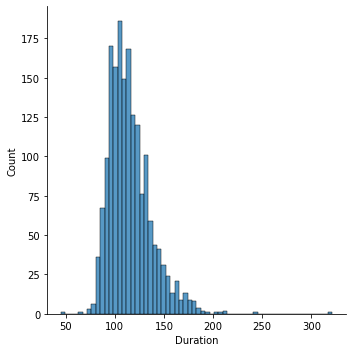

In [25]:
sns.displot(data=df, x="Duration",)

Most movies are 90 to 120 minutes long.
Very less movies are there which are less than 60 minutes or more than 200 minutes.

#### Year

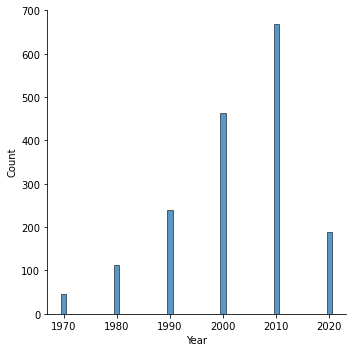

In [26]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()


Most movies have been launched in the decade of 2000-2010.

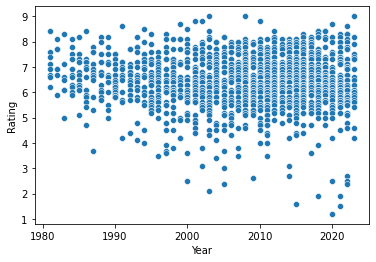

In [27]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rating"])
plt.show()


Highest rated movies have been released in years between 2000-2010.

Some of new movies launched between year 2015-2020 has been the lowest rated movies.

Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

#### Metascore

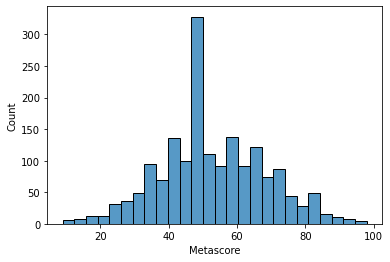

In [28]:
sns.histplot(x=df["Metascore"])
plt.show()


Metascore varies between 0 to 100 while most movies has metascore lies around 50

#### Genre

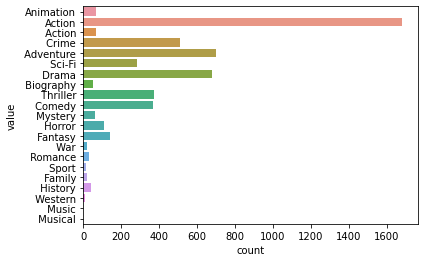

In [30]:
sns.countplot(data=pd.melt(df, value_vars=["Genre 1", "Genre 2", "Genre 3"]), y="value")
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.

#### Certification

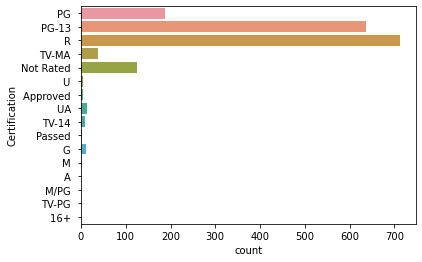

In [31]:
sns.countplot(y=df["Certification"])
plt.show()


Most movies are PG-13 and R rated

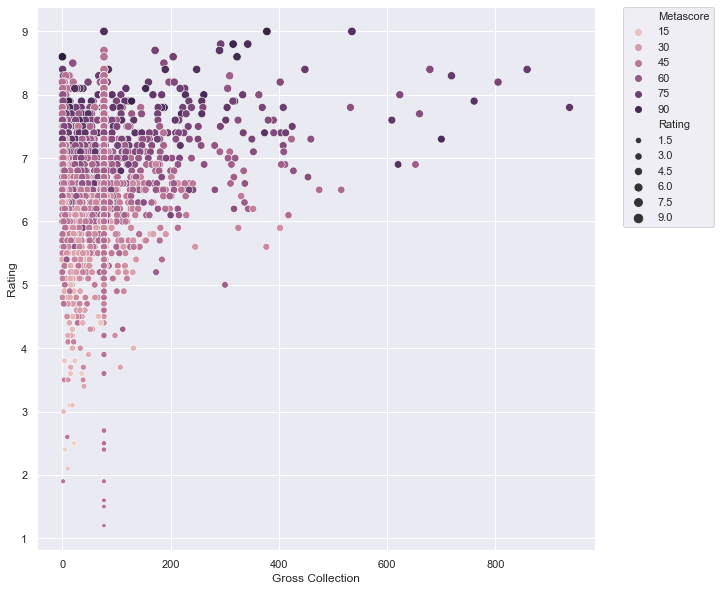

In [33]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Gross Collection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can have the following conclusions :-

-Higher rated movies have been found to have higher gross collection.

-Even with high rating and metascore, movies have been found to be grossing below average.

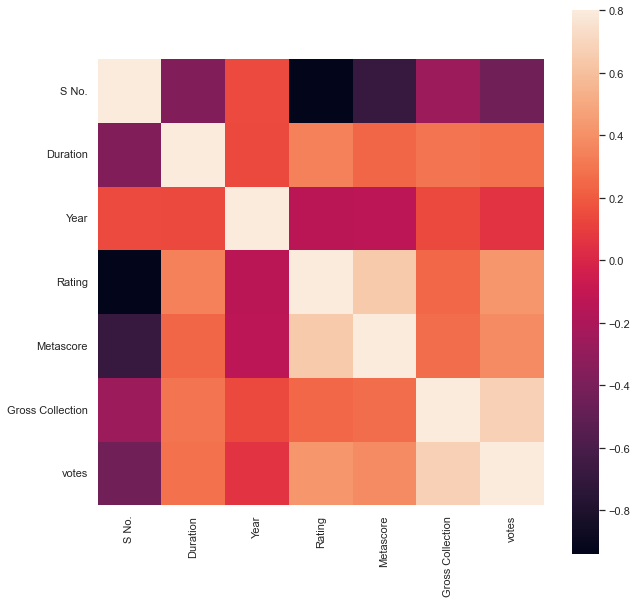

In [34]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()


Metascore and rating are co related.

Gross collection and votes are co related.

### Preparing for machine learning

In [36]:
df1=df.drop(["S No.","Movie Name",], axis=1)

In [37]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director 1']=le.fit_transform(df1['Director 1'])
df1['Star 1']=le.fit_transform(df1['Star 1'])
df1['Star 2']=le.fit_transform(df1['Star 2'])
df1['Star 3']=le.fit_transform(df1['Star 3'])
df1['Star 4']=le.fit_transform(df1['Star 4'])
df1['Genre 1']=le.fit_transform(df1['Genre 1'])
df1['Genre 2']=le.fit_transform(df1['Genre 2'])
df1['Genre 3']=le.fit_transform(df1['Genre 3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [38]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1754
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          1751 non-null   int64  
 1   Year              1751 non-null   int64  
 2   Rating            1751 non-null   float64
 3   Metascore         1751 non-null   int32  
 4   Director 1        1751 non-null   int32  
 5   Star 1            1751 non-null   int32  
 6   Star 2            1751 non-null   int32  
 7   Star 3            1751 non-null   int32  
 8   Star 4            1751 non-null   int32  
 9   Genre 1           1751 non-null   int32  
 10  Genre 2           1751 non-null   int32  
 11  Genre 3           1751 non-null   int32  
 12  Gross Collection  1751 non-null   float64
 13  Certification     1751 non-null   int32  
 14  votes             1751 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 208.2 KB


All columns have been changed into integer or float datatype.

### Outlier Treatment


In [39]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director 1,Star 1,Star 2,Star 3,Star 4,Genre 1,Genre 2,Genre 3,Gross Collection,Certification,votes
8,153,2020,8.7,48,864,641,87,950,1366,0,5,4,77.06093,12,119663
20,101,2003,8.4,77,659,110,1150,643,739,0,5,11,0.71000,10,597911
22,137,1986,8.4,84,367,619,764,177,1046,0,1,13,85.16000,10,733883
23,145,2019,8.4,48,538,363,819,95,427,0,1,3,77.06093,6,36347
24,141,2019,8.4,48,917,165,712,985,1032,0,5,4,77.06093,6,31292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,95,1997,3.6,11,449,565,1052,504,1210,0,1,6,35.93000,8,56543
1733,99,2017,3.6,48,26,569,343,966,1051,0,5,4,77.06093,10,33485
1734,98,1996,3.5,40,193,511,49,14,278,0,11,4,3.79000,10,30366
1735,89,2011,3.5,37,760,308,507,581,1177,0,1,2,38.54000,7,27060


In [40]:
(1739-1470)*100/1739

15.468660149511214

15.5 % has been removed in outlier treatment, which is acceptable.

In [41]:
dfn.skew()

Duration            0.813869
Year               -0.908063
Rating             -0.319833
Metascore           0.162227
Director 1         -0.113410
Star 1              0.024989
Star 2             -0.019544
Star 3              0.035083
Star 4              0.034287
Genre 1             0.000000
Genre 2             1.323096
Genre 3             0.315911
Gross Collection    1.826342
Certification      -0.188483
votes               1.951589
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [42]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["Gross Collection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre 2


In [43]:
dfn.skew()

Duration            0.022584
Year               -0.349413
Rating             -0.319833
Metascore           0.162227
Director 1         -0.113410
Star 1              0.024989
Star 2             -0.019544
Star 3              0.035083
Star 4              0.034287
Genre 1             0.000000
Genre 2             0.061505
Genre 3             0.315911
Gross Collection    1.826342
Certification      -0.188483
votes               1.951589
dtype: float64

### Scaling of Independent features

In [45]:
X=dfn.drop(["Gross Collection"],axis=1)
y=dfn["Gross Collection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [46]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.4673705329950292
At random state 0, The test accuracy is :-0.5230648742608244


At random state 1, The training accuracy is :-0.47619616494194095
At random state 1, The test accuracy is :-0.5056463217662052


At random state 2, The training accuracy is :-0.4976820368315644
At random state 2, The test accuracy is :-0.46490728108256674


At random state 3, The training accuracy is :-0.4707938804978773
At random state 3, The test accuracy is :-0.5174287852140655


At random state 4, The training accuracy is :-0.5151766814152332
At random state 4, The test accuracy is :-0.4311706723164821


At random state 5, The training accuracy is :-0.48814084095814636
At random state 5, The test accuracy is :-0.4906957638284152


At random state 6, The training accuracy is :-0.4893436672532958
At random state 6, The test accuracy is :-0.4875796995528586


At random state 7, The training accuracy is :-0.45852548393263726
At random state 7, The test accurac

At random state 67, The test accuracy is :-0.5404218939373269


At random state 68, The training accuracy is :-0.5170254091331328
At random state 68, The test accuracy is :-0.42090115403064


At random state 69, The training accuracy is :-0.49811651431004433
At random state 69, The test accuracy is :-0.47482741817320373


At random state 70, The training accuracy is :-0.5393809998872363
At random state 70, The test accuracy is :-0.35929553033121153


At random state 71, The training accuracy is :-0.5006940159724609
At random state 71, The test accuracy is :-0.4675915513379475


At random state 72, The training accuracy is :-0.464514641701662
At random state 72, The test accuracy is :-0.5225683677144064


At random state 73, The training accuracy is :-0.5087093448814
At random state 73, The test accuracy is :-0.44592928602457693


At random state 74, The training accuracy is :-0.4841709999525764
At random state 74, The test accuracy is :-0.4935017883731668


At random state 75, The trai

At random state 78, The training accuracy is :-0.4480604087812341

At random state 78, The test accuracy is :-0.5589077418615493


In [47]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(990, 14) (990,)
(488, 14) (488,)


In [48]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 33.602013695887635
Mean Squared Error: 1923.7884413866645
Root Mean Squared Error: 43.861012772012735
R squared score:  0.4824079406225753
Cross Validation Score is : [0.43847432 0.41430273 0.43149571 0.5075442  0.55089438]
Mean Score : 0.4685422677375165
Difference : -0.0138656728850588


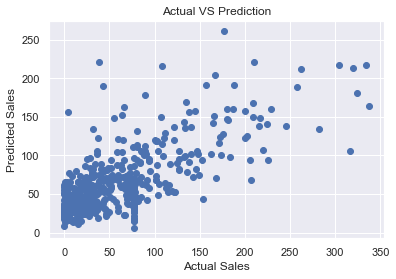



Scores for Lasso() are
Mean Absolute Error: 33.833613644133756
Mean Squared Error: 1942.3797426181286
Root Mean Squared Error: 44.072437448116354
R squared score:  0.47740598215152663
Cross Validation Score is : [0.44609023 0.43027789 0.43745992 0.51440553 0.54534839]
Mean Score : 0.4747163914268409
Difference : -0.00268959072468572


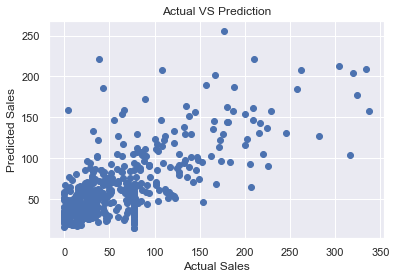



Scores for SVR() are
Mean Absolute Error: 38.89750086203826
Mean Squared Error: 3057.3445756871797
Root Mean Squared Error: 55.29325976723727
R squared score:  0.17742656047164274
Cross Validation Score is : [0.12032719 0.14601336 0.08150704 0.08203645 0.06483989]
Mean Score : 0.09894478691778222
Difference : -0.07848177355386052


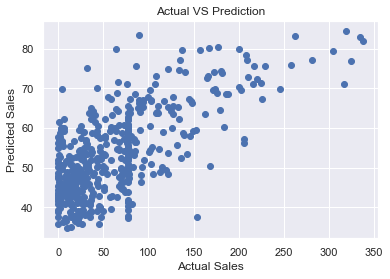



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 41.14793078695203
Mean Squared Error: 3258.460324095667
Root Mean Squared Error: 57.08292497845277
R squared score:  0.12331670506729864
Cross Validation Score is : [0.02258001 0.2916606  0.27067294 0.15508941 0.26230051]
Mean Score : 0.20046069429327779
Difference : 0.07714398922597915


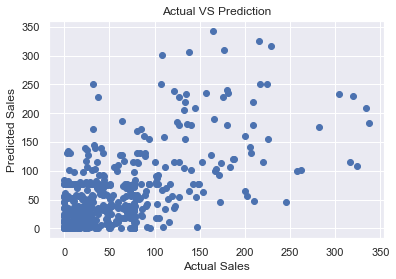



Scores for RandomForestRegressor() are
Mean Absolute Error: 30.29719579145939
Mean Squared Error: 1746.8078612406084
Root Mean Squared Error: 41.79483055642897
R squared score:  0.5300242694126478
Cross Validation Score is : [0.43082476 0.59770123 0.61939156 0.57135018 0.66657511]
Mean Score : 0.5771685670115527
Difference : 0.04714429759890493


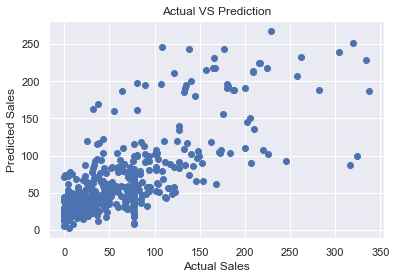



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 29.78828001440614
Mean Squared Error: 1632.2189284711862
Root Mean Squared Error: 40.40072930617944
R squared score:  0.560854229931194
Cross Validation Score is : [0.45711909 0.59099628 0.66181688 0.57382725 0.69072169]
Mean Score : 0.5948962377412762
Difference : 0.03404200781008215


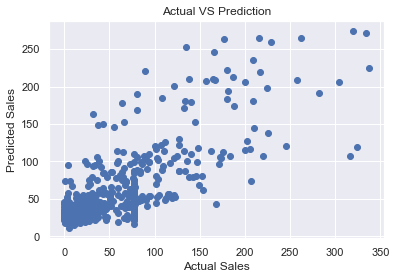

In [49]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

## Hyperparamter Tuning and treating overfitting/underfitting

In [50]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [52]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [53]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5971799514665076
The mean absolute error 29.54198436264058
root_mean_squared_error: 39.55467658360045


In [54]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [55]:
GB_l=joblib.load('gross_collection.obj')

### Scaling of Independent Features

In [56]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

### Predicting the best random state

In [57]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5118532690316608
At random state 0, The test accuracy is :0.5629067660697403


At random state 1, The training accuracy is :0.5124677996187177
At random state 1, The test accuracy is :0.5807752470365768


At random state 2, The training accuracy is :0.5451277451280678
At random state 2, The test accuracy is :0.49583429712243554


At random state 3, The training accuracy is :0.5334017835429705
At random state 3, The test accuracy is :0.5328375007808517


At random state 4, The training accuracy is :0.5574591068974767
At random state 4, The test accuracy is :0.4598197621121676


At random state 5, The training accuracy is :0.5341430118269778
At random state 5, The test accuracy is :0.5344512668589712


At random state 6, The training accuracy is :0.5360474967856081
At random state 6, The test accuracy is :0.5328687119980378


At random state 7, The training accuracy is :0.5123613670224105
At random state 7, The test accuracy is :0.5822567406

At random state 77, The training accuracy is :0.5208931566633817
At random state 77, The test accuracy is :0.5636729347040778


At random state 78, The training accuracy is :0.5089173433997689
At random state 78, The test accuracy is :0.5765455853014942


At random state 79, The training accuracy is :0.5182653106823027
At random state 79, The test accuracy is :0.5619226249808076


At random state 80, The training accuracy is :0.545909761177682
At random state 80, The test accuracy is :0.5076420471146132


At random state 81, The training accuracy is :0.5371687782462073
At random state 81, The test accuracy is :0.5273422970101069


At random state 82, The training accuracy is :0.5223461732019903
At random state 82, The test accuracy is :0.5467021918678319


At random state 83, The training accuracy is :0.555380091239049
At random state 83, The test accuracy is :0.49168231529353723


At random state 84, The training accuracy is :0.5312160053127757
At random state 84, The test accuracy is

At random state 67, The training accuracy is :0.49841394264375927

At random state 67, The test accuracy is :0.5978460841148401

In [58]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(990, 14) (990,)
(488, 14) (488,)


Scores for LinearRegression() are
Mean Absolute Error: 76749.87527418623
Mean Squared Error: 10647774961.500328
Root Mean Squared Error: 103188.05629286912
R squared score:  0.5807752470365768
Cross Validation Score is : [0.48264301 0.46642973 0.41914973 0.49566219 0.57841633]
Mean Score : 0.4884601974602674
Difference : -0.09231504957630937


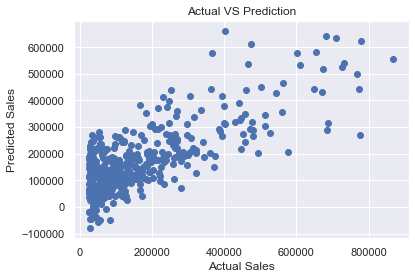



Scores for Lasso() are
Mean Absolute Error: 76749.9330967404
Mean Squared Error: 10647814482.124523
Root Mean Squared Error: 103188.24779074661
R squared score:  0.5807736910284929
Cross Validation Score is : [0.48264584 0.46643103 0.41914888 0.4956689  0.57841886]
Mean Score : 0.4884627018952388
Difference : -0.09231098913325403


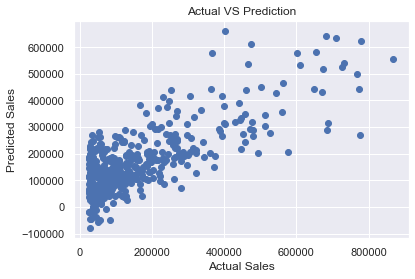



Scores for SVR() are
Mean Absolute Error: 104287.57284382831
Mean Squared Error: 28360109427.261364
Root Mean Squared Error: 168404.6003744
R squared score:  -0.11659571240450362
Cross Validation Score is : [-0.15883156 -0.20560442 -0.15962252 -0.09841617 -0.08663294]
Mean Score : -0.14182152229451553
Difference : -0.025225809890011913


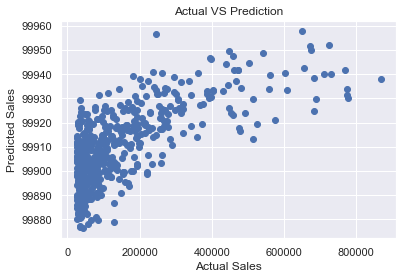



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 77055.35450819672
Mean Squared Error: 15011520102.30123
Root Mean Squared Error: 122521.50873336988
R squared score:  0.40896564500589805
Cross Validation Score is : [0.25229222 0.35985292 0.27247602 0.34709581 0.44731461]
Mean Score : 0.3358063141231301
Difference : -0.07315933088276794


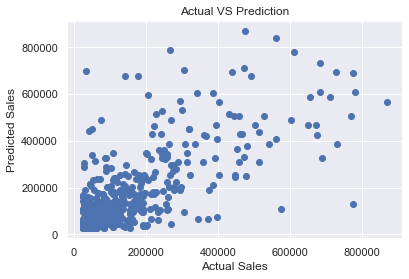



Scores for RandomForestRegressor() are
Mean Absolute Error: 59342.94801229508
Mean Squared Error: 7329716030.708188
Root Mean Squared Error: 85613.76075554786
R squared score:  0.7114140368878805
Cross Validation Score is : [0.66956998 0.716837   0.62940485 0.67338042 0.72763355]
Mean Score : 0.6833651620382731
Difference : -0.028048874849607386


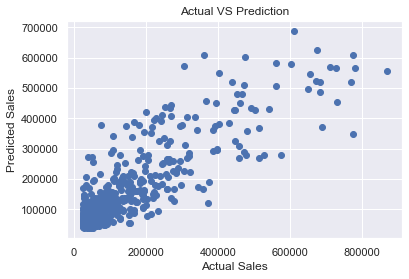



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 55249.99393752187
Mean Squared Error: 6508027855.899026
Root Mean Squared Error: 80672.3487689495
R squared score:  0.7437655867039559
Cross Validation Score is : [0.75141185 0.75318727 0.67115837 0.68457476 0.79182002]
Mean Score : 0.7304304561013879
Difference : -0.013335130602567968


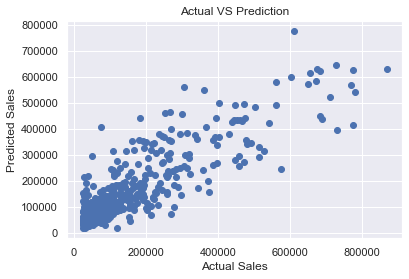

In [59]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

### Hyperparamter Tuning and treating overfitting/underfitting

In [60]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [61]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [62]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7822967209600076
The mean absolute error 52164.974793659385
root_mean_squared_error: 74359.84201342706


In [63]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [64]:
GB1_l=joblib.load('votes.obj')